<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [11]:
!pip install numpy pandas seaborn
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])
!pip install scikit-learn


   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 1.6/44.5 MB 9.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/44.5 MB 9.1 MB/s eta 0:00:05
   ---- ----------------------------------- 5.5/44.5 MB 9.3 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/44.5 MB 9.5 MB/s eta 0:00:04
   -------- ------------------------------- 10.0/44.5 MB 9.7 MB/s eta 0:00:04
   ----------- ---------------------------- 12.3/44.5 MB 10.0 MB/s eta 0:00:04
   ------------ --------------------------- 13.9/44.5 MB 9.7 MB/s eta 0:00:04
   -------------- ------------------------- 16.3/44.5 MB 9.9 MB/s eta 0:00:03
   ---------------- ----------------------- 18.4/44.5 MB 9.8 MB/s eta 0:00:03
   ------------------ --------------------- 20.2/44.5 MB 9.7 MB/s eta 0:00:03
   -------------------- ------------------- 22.3/44.5 MB 9.7 MB/s eta 0:00:03
   --------------------- ------------------ 24.4/44.5 MB 9.8 MB/s eta 0:00:

We will import the following libraries for the lab


In [12]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
# !pip install pandas
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [13]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [94]:
# from js import fetch
import io
import requests

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
resp1 = requests.get(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
text1 = io.BytesIO(resp1.content)
data = pd.read_csv(text1)

In [95]:
data.head()
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [96]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
resp2 = requests.get(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
text2 = io.BytesIO(resp2.content)
X = pd.read_csv(text2)

In [97]:
X.head(100)
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [98]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [99]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [101]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [102]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [103]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# Create a GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
# Fit the model to find the best parameters
logreg_cv.fit(X_train, Y_train)
# Display the best parameters found
print("Best parameters:", logreg_cv.best_params_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [104]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [105]:
from sklearn.metrics import accuracy_score
# Extract the best parameters from GridSearchCV
best_params = logreg_cv.best_params_
lr_best = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])
lr_best.fit(X_train, Y_train)
lr_train_accuracy = lr_best.score(X_train, Y_train)
# print("Training Accuracy:", train_accuracy)
lr_test_acc = accuracy_score(Y_test, lr_best.predict(X_test))

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [106]:
print("Train Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_acc)

Train Accuracy: 0.875
Test Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


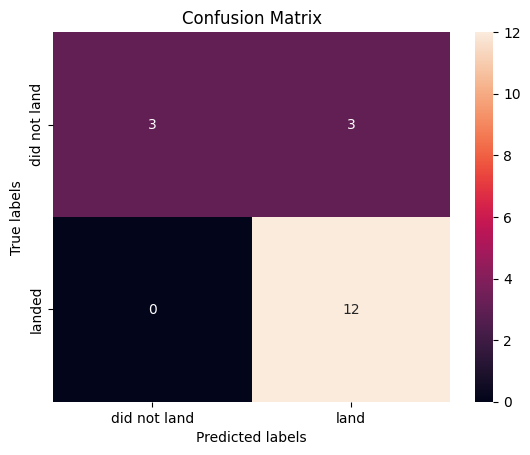

In [107]:
yhat=lr_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [108]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("Best parameters:", svm_cv.best_params_)

Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}


In [109]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [110]:
# Train an SVM model with the best parameters
best_params = svm_cv.best_params_
svm_best = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
# Fit the model with the training data
svm_best.fit(X_train, Y_train)
# Evaluate the model
svm_train_accuracy = svm_best.score(X_train, Y_train)
# test_accuracy = svm_best.score(X_test, Y_test)
svm_test_acc = accuracy_score(Y_test, svm_best.predict(X_test))


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [111]:
print("Training Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_acc)

Training Accuracy: 0.8888888888888888
Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


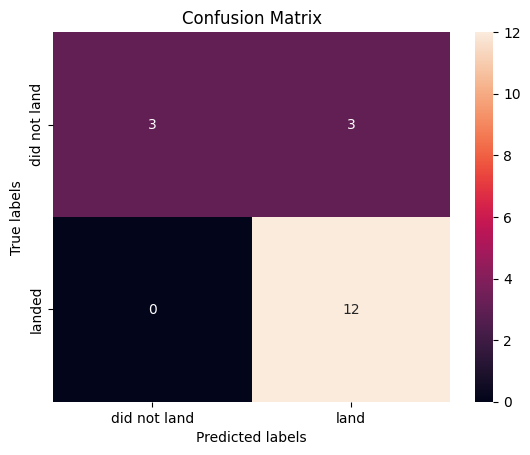

In [112]:
yhat=svm_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [113]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("Best parameters:", tree_cv.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


C:\Users\ajaiv\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ajaiv\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajaiv\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ajaiv\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    v

In [114]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8732142857142856


In [115]:
# Train a Decision Tree Classifier with the best parameters
best_params = tree_cv.best_params_
tree_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    splitter=best_params['splitter'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)

# Fit the model with training data
tree_best.fit(X_train, Y_train)
tree_test_acc = accuracy_score(Y_test, tree_best.predict(X_test))
tree_train_accuracy = tree_best.score(X_train, Y_train)
# test_accuracy = tree_best.score(X_test, Y_test)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [116]:
print("Training Accuracy:", tree_train_accuracy)
print("Test Accuracy:", tree_test_acc)

Training Accuracy: 0.9166666666666666
Test Accuracy: 0.7777777777777778


We can plot the confusion matrix


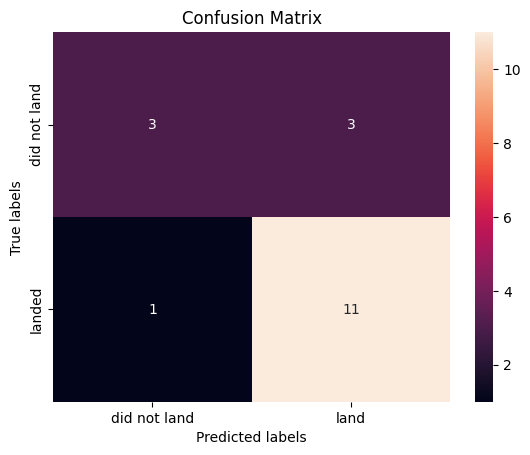

In [117]:
yhat = tree_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [118]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("Best parameters:", knn_cv.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}


In [119]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [121]:
# Train a KNN Classifier with the best parameters
best_params = knn_cv.best_params_
knn_best = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    algorithm=best_params['algorithm'],
    p=best_params['p']
)
# Fit the model with training data
knn_best.fit(X_train, Y_train)
# Evaluate the model
knn_train_accuracy = knn_best.score(X_train, Y_train)
# test_accuracy = knn_best.score(X_test, Y_test)
knn_test_acc = accuracy_score(Y_test, knn_best.predict(X_test))


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [122]:
print("Training Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_acc)

Training Accuracy: 0.8611111111111112
Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


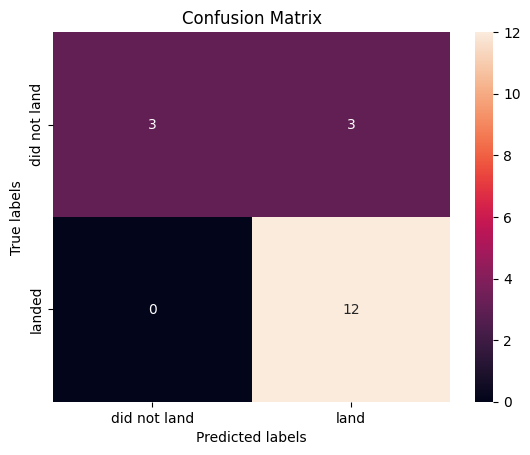

In [123]:
yhat = knn_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [124]:
# # Compare the accuracies
# accuracies = {
#     "Logistic Regression": logreg_accuracy,
#     "SVM": svm_accuracy,
#     "Decision Tree": tree_accuracy,
#     "KNN": knn_accuracy
# }
# # Find the model with the best accuracy
# best_model = max(accuracies, key=accuracies.get)
# best_accuracy = accuracies[best_model]
# print(f"The best model is {best_model} with an accuracy of {best_accuracy}")

results = {
    'Logistic Regression': lr_test_acc,
    'SVM': svm_test_acc,
    'Decision Tree': tree_test_acc,
    'KNN': knn_test_acc
}

# Find the best model
best_model = max(results, key=results.get)
print("Model Performance:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
print(f"\nBest Performing Model: {best_model} with accuracy {results[best_model]:.4f}")

Model Performance:
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.7778
KNN: 0.8333

Best Performing Model: Logistic Regression with accuracy 0.8333


In [125]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(Y_test, lr_best.predict(X_test), average='weighted')
svm_f1 = f1_score(Y_test, svm_best.predict(X_test), average='weighted')
tree_f1 = f1_score(Y_test, tree_best.predict(X_test), average='weighted')
knn_f1 = f1_score(Y_test, knn_best.predict(X_test), average='weighted')

# Compare F1-scores
f1_results = {
    'Logistic Regression': lr_f1,
    'SVM': svm_f1,
    'Decision Tree': tree_f1,
    'KNN': knn_f1
}

# Find the best model
best_model = max(f1_results, key=f1_results.get)
print("F1-Scores:")
for model, f1 in f1_results.items():
    print(f"{model}: {f1:.4f}")
print(f"\nBest Performing Model (by F1-Score): {best_model} with F1-score {f1_results[best_model]:.4f}")


F1-Scores:
Logistic Regression: 0.8148
SVM: 0.8148
Decision Tree: 0.7641
KNN: 0.8148

Best Performing Model (by F1-Score): Logistic Regression with F1-score 0.8148


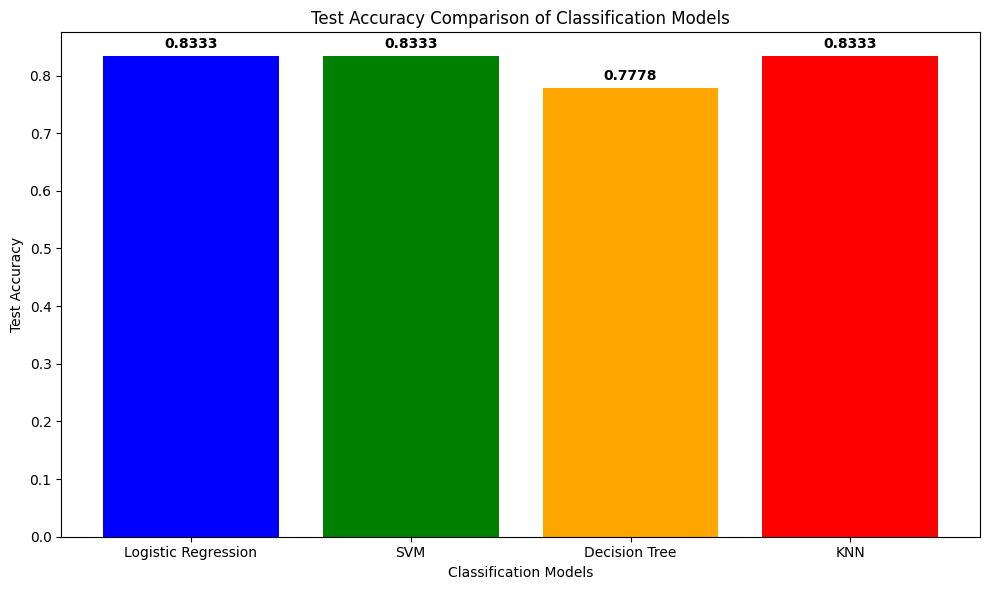

In [127]:
import matplotlib.pyplot as plt

# Store model names and their respective test accuracies
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
test_accuracies = [lr_best.score(X_test, Y_test), 
                   svm_best.score(X_test, Y_test), 
                   tree_best.score(X_test, Y_test), 
                   knn_best.score(X_test, Y_test)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Classification Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Classification Models')

# Display the accuracy values on top of the bars
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


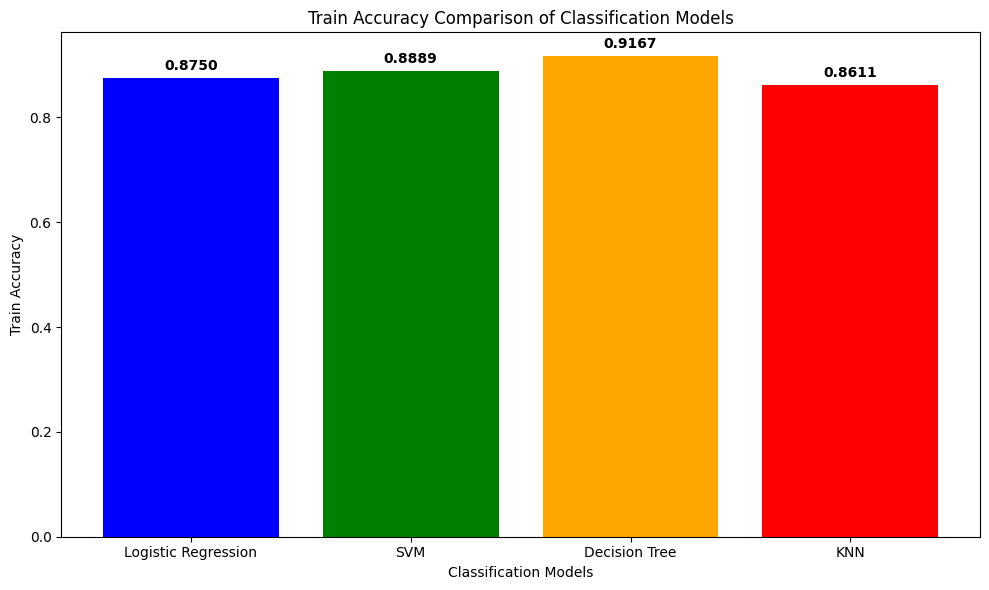

In [130]:
import matplotlib.pyplot as plt

# Store model names and their respective test accuracies
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
test_accuracies = [lr_best.score(X_train, Y_train), 
                   svm_best.score(X_train, Y_train), 
                   tree_best.score(X_train, Y_train), 
                   knn_best.score(X_train, Y_train)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Classification Models')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy Comparison of Classification Models')

# Display the accuracy values on top of the bars
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [131]:
#Instead of using a single decision tree, consider ensemble models like Random Forests or Gradient Boosting that tend to generalize better:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)


tree = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=42
)

tree.fit(X_train, Y_train)
train_accuracy = tree.score(X_train, Y_train)
test_accuracy = tree.score(X_test, Y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.8888888888888888
Test Accuracy: 0.8333333333333334


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
